<a href="https://colab.research.google.com/github/viethoang1122334/Machine-Learning/blob/master/Assignment_6_(Not_complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 6: Boston Marathon

# Table of content
1. [Introduction](#introduction)

2. [Data processing](#dataprocessing)

3. [Apply k-means clustering to data](#kmeans)

4. [Draw bar graphs (both male & female in different color) for each cluster for male and female, from the bar graphs, you can tell things as which cluster contains the most number of female (or male)](#question1)

5. [Draw bar graphs for runners in different ranges of age (dividing by 3 groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors), from the graph, you should be able to anwser which cluster contains the most young people, which cluster contains oldest people, etc](#question2)

6. [Do the same things as above for finishing time (which group runs fastest)](#question3)

# 1. Introduction <a name="introduction"></a>

Here is the information on ​runners and their performance for the Boston Marathon in 2014 from https://github.com/llimllib/bostonmarathon. I will apply k-means to cluster the data and do some analysis. My project include 6 part:
1. Introduction
2. Data processing
3. Apply k-means clustering to data
4.  Draw bar graphs (both male & female in different color) for each cluster for male and female, from the bar graphs, you can tell things as which cluster contains the most number of female (or male)
5.  Draw bar graphs for runners in different ranges of age (dividing by 3 groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors), from the graph, you should be able to anwser which cluster contains the most young people, which cluster contains oldest people, etc
6. Do the same things as above for finishing time (which group runs fastest)

# 2. Data processing <a name="dataprocessing"></a>

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Import data link
url = 'gdrive/My Drive/Marathon/results.csv'
data = pd.read_csv(url)

In [4]:
# Dataset head
pd.set_option('display.max_columns', None)  
data.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [5]:
# Number of rows and columns
print("Shape of dataframe is: {}".format(data.shape))

Shape of dataframe is: (31984, 21)


In [6]:
# Dataset columns
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [7]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


- '10k' , '25k' , '35k' , 'pace' , '30k' , '5k' , 'half' , '20k' and '40k' is numerical data so their values need to be convert to float 


In [8]:
# The amount of missing data
data.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [9]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

10k           0.000000
name          0.000000
division      0.000000
25k           0.000000
gender        0.000000
age           0.000000
official      0.000000
bib           0.000000
genderdiv     0.000000
ctz          96.110555
35k           0.000000
overall       0.000000
pace          0.000000
state         8.054027
30k           0.000000
5k            0.000000
half          0.000000
20k           0.000000
country       0.000000
city          0.003127
40k           0.000000
dtype: float64

Check "state" column

In [10]:
# Rows do not have value in "state"
bool_series = pd.isnull(data["state"])
data[bool_series]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31807,58.15,"Zotov, Ilya",5025,148.97,M,30,290.52,35725,14837,NaN,229.68,26191,11.08,NaN,186.00,29.05,123.92,117.32,RUS,Moscow,272.22
31808,55.72,"Gyske, Petr",3828,135.93,M,28,229.05,35726,9862,NaN,190.35,15041,8.75,NaN,163.17,28.38,115.07,109.28,RUS,Moscow,216.98
31813,50.28,"Gusztos, Peter",4077,130.65,M,37,240.63,35731,11228,NaN,190.57,18224,9.18,NaN,160.68,25.08,108.60,102.77,HUN,Budapest,224.52
31929,51.55,"Quinn, Jim",1556,123.58,M,44,218.75,35856,8556,NaN,174.53,12025,8.35,NaN,147.72,26.48,105.02,99.70,IRL,Leopardstown,205.02


In [11]:
# Rows have value in "state"
bool_series1 = pd.notnull(data["state"])
data[bool_series1]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83
14,17.12,"Cassidy, Josh R.",13,48.88,M,29,87.40,W8,13,NaN,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38
15,33.93,"Linden, Desiree",10,85.03,F,30,143.90,F8,10,NaN,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47
24,18.30,"Filteau, Michel",14,50.33,M,47,89.40,W13,14,NaN,74.95,14,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,KOR,75.02,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,174.90,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,244.70,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,229.62,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,247.18,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87


Remove columns

- 'name' should be removed
- 'ctz' is removed because its data misses 95%
- 'state' and 'city' has missing value but they are category datas which is probably not related to the race results. So they are removed

In [0]:
# Classify data as remove, category and numeric
remove = ['ctz','name','state','city']
categorical_features = ['name', 'gender','age','bib','genderdiv','state','country','city']
continuous_features = ['10k', '25k', 'division', 'official', '35k', 'overall', 'pace','30k','5k','half','20k','40k']

In [13]:
# Remove 'ctz' , 'name' , 'state' and 'city' columns
data1= data.drop(remove, axis=1)
data1

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22
31980,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47
31981,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30
31982,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87


In [14]:
# Remove rows missing data
data2 = data1.dropna()
data2

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22
31980,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47
31981,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30
31982,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87


In [15]:
# Data types
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31984 entries, 0 to 31983
Data columns (total 17 columns):
10k          31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 4.4+ MB


Convert object feature to numeric feature

In [16]:
converted_features = ['10k', '25k', '35k', 'pace','30k','5k','half','20k','40k']
data2[converted_features] = data2[converted_features].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(data2.dtypes)

10k          float64
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
country       object
40k          float64
dtype: object


In [17]:
data2.isnull().sum()

10k           50
division       0
25k          216
gender         0
age            0
official       0
bib            0
genderdiv      0
35k           34
overall        0
pace           0
30k           40
5k            52
half          72
20k           51
country        0
40k           39
dtype: int64

In [18]:
# Remove rows missing data
data3 = data2.dropna()
data3.reset_index(drop=True,inplace=True)
data3

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22
31645,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47
31646,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30
31647,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87


In [19]:
data3.isnull().sum()

10k          0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
40k          0
dtype: int64

In [20]:
# Describe numerical data
data3[continuous_features].describe()

,10k,25k,division,official,35k,overall,pace,30k,5k,half,20k,40k
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,133.581175,1922.747291,241.952383,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990
std,8.710102,25.571480,1704.843679,50.842552,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493
min,16.620000,45.800000,1.000000,80.600000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.370000,115.430000,607.000000,205.300000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000
50%,50.280000,128.850000,1418.000000,231.980000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000
75%,57.000000,147.700000,2601.000000,272.200000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000
max,112.380000,289.020000,6979.000000,538.880000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


Scale numeric data

In [21]:
# Scale numeric data to (0.01, 1)
mms = MinMaxScaler(feature_range = (0.01, 1))
mms.fit(data3[continuous_features])
data_transformed = mms.transform(data3[continuous_features])
data_transformed

array([[0.01775376, 0.01761163, 0.01099312, ..., 0.01842277, 0.01815139,
        0.01991718],
       [0.175     , 0.15909835, 0.01      , ..., 0.16669352, 0.166349  ,
        0.13825911],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       ...,
       [0.4481391 , 0.46270866, 0.75200344, ..., 0.47120922, 0.46873944,
        0.4456229 ],
       [0.49724624, 0.50666886, 0.83273001, ..., 0.50340516, 0.50329084,
        0.49044488],
       [0.39262218, 0.3731601 , 0.20791488, ..., 0.38927406, 0.38827729,
        0.3315181 ]])

In [22]:
data_scaled = pd.DataFrame(data = data_transformed, columns=continuous_features)
data_scaled

,10k,25k,division,official,35k,overall,pace,30k,5k,half,20k,40k
0,0.017754,0.017612,0.010993,0.020045,0.020317,0.010217,0.020755,0.018448,0.013375,0.018423,0.018151,0.019917
1,0.175000,0.159098,0.010000,0.136051,0.136890,0.010620,0.135660,0.142689,0.115875,0.166694,0.166349,0.138259
2,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
3,0.174897,0.159098,0.010284,0.139572,0.136890,0.010806,0.139623,0.142689,0.115625,0.166694,0.166349,0.140206
4,0.015169,0.012320,0.010142,0.011361,0.011063,0.010031,0.011132,0.011795,0.013375,0.012841,0.012524,0.011420
...,...,...,...,...,...,...,...,...,...,...,...,...
31644,0.362538,0.328386,0.494218,0.293317,0.288613,0.315340,0.293019,0.295306,0.239750,0.342675,0.343681,0.294277
31645,0.471711,0.495272,0.749308,0.489403,0.469551,0.861251,0.489434,0.464819,0.301500,0.497524,0.495245,0.489529
31646,0.448139,0.462709,0.752003,0.445075,0.430460,0.787955,0.445283,0.431461,0.265375,0.471209,0.468739,0.445623
31647,0.497246,0.506669,0.832730,0.489857,0.475980,0.861871,0.489434,0.477475,0.300375,0.503405,0.503291,0.490445


In [23]:
data_scaled.isnull().sum()

10k         0
25k         0
division    0
official    0
35k         0
overall     0
pace        0
30k         0
5k          0
half        0
20k         0
40k         0
dtype: int64

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
X_pca

array([[-1.12669318, -0.14880578],
       [-0.84884329, -0.03614152],
       [-1.14614317, -0.15540142],
       ...,
       [ 0.53382871, -0.29712068],
       [ 0.70041795, -0.31900107],
       [-0.05892541,  0.05873486]])

In [25]:
data3.shape

(31649, 17)

In [26]:
# Add PCA component to data
data4 = pd.concat([data3, pd.DataFrame(X_pca, columns=['PCA_component_1', 'PCA_component_2'])], axis=1)
data4

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k,PCA_component_1,PCA_component_2
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43,-1.126693,-0.148806
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10,-0.848843,-0.036142
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10,-1.146143,-0.155401
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95,-0.846381,-0.035550
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72,-1.141417,-0.153606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22,-0.134641,-0.277051
31645,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47,0.654989,-0.247643
31646,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30,0.533829,-0.297121
31647,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87,0.700418,-0.319001


In [27]:
data4.isnull().sum()

10k                0
division           0
25k                0
gender             0
age                0
official           0
bib                0
genderdiv          0
35k                0
overall            0
pace               0
30k                0
5k                 0
half               0
20k                0
country            0
40k                0
PCA_component_1    0
PCA_component_2    0
dtype: int64

# 3. Apply k-means clustering to data <a name="kmeans"></a>

I apply k-means to only numerical data.

Initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Plot sum of squared distances-k chart

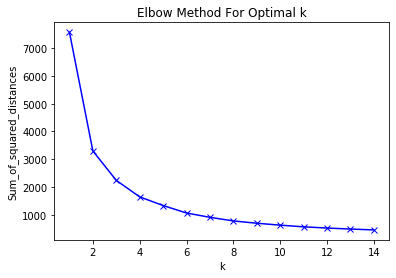

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

- The elbow on the arm is optimal k, so select k=5

Insert 'cluster' column to dataframe

In [0]:
# k-means with k=5
km = KMeans(5)
km = km.fit(data_transformed)

In [0]:
# Predict cluster for our data
cluster_pred = km.predict(data_transformed)

In [32]:
cluster_pred

array([0, 0, 0, ..., 2, 2, 3], dtype=int32)

In [33]:
# Add predicted cluster column to dataframe
data4['Cluster'] = cluster_pred
data4

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k,PCA_component_1,PCA_component_2,Cluster
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43,-1.126693,-0.148806,0
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10,-0.848843,-0.036142,0
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10,-1.146143,-0.155401,0
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95,-0.846381,-0.035550,0
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72,-1.141417,-0.153606,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22,-0.134641,-0.277051,4
31645,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47,0.654989,-0.247643,2
31646,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30,0.533829,-0.297121,2
31647,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87,0.700418,-0.319001,2


Visulazation of 5 cluster

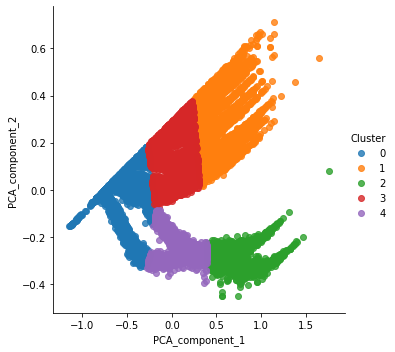

In [66]:
#plot data with seaborn
facet = sns.lmplot(data=data4, x='PCA_component_1', y='PCA_component_2', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)

# 4.  Draw bar graphs (both male & female in different color) for each cluster for male and female, from the bar graphs, you can tell things as which cluster contains the most number of female (or male) <a name="question1"></a>

In [0]:
# Divide data into Male and Female
Male = data4.loc[data4['gender'] == 'M']
Female = data4.loc[data4['gender'] == 'F']

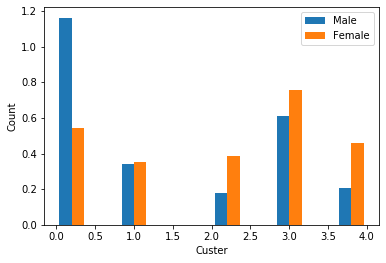

In [36]:
# plot bar graph for gender
plt.hist([Male.Cluster, Female.Cluster], density =True, label=['Male', 'Female'])
plt.xlabel("Custer")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

- Cluster 3 contains the most number of male.
- Cluster 0, 1 and 2 contains the most number of female.
- Cluster 4 contains an equal number of male and female.

# 5. Draw bar graphs for runners in different ranges of age (dividing by 3 groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors), from the graph, you should be able to anwser which cluster contains the most young people, which cluster contains oldest people, etc <a name="question2"></a>

In [37]:
# Make a copy of data3
data5 = data4.copy()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,30k,5k,half,20k,country,40k,PCA_component_1,PCA_component_2,Cluster
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,59.18,8.02,39.72,37.65,JPN,80.43,-1.126693,-0.148806,0
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,99.33,16.22,69.47,65.83,KEN,132.10,-0.848843,-0.036142,0
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,56.45,7.75,38.03,36.10,RSA,76.10,-1.146143,-0.155401,0
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,99.33,16.20,69.47,65.83,ETH,132.95,-0.846381,-0.035550,0
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,57.03,8.02,38.60,36.58,JPN,76.72,-1.141417,-0.153606,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,50.72,3414,124.02,M,32,211.75,35908,7500,174.90,9849,8.08,148.65,26.13,104.78,99.55,USA,200.22,-0.134641,-0.277051,4
31645,61.28,5212,165.02,M,34,302.52,35909,15459,244.70,27456,11.55,203.43,31.07,135.85,128.37,USA,285.47,0.654989,-0.247643,2
31646,59.00,5231,157.02,F,21,282.00,35910,10788,229.62,25092,10.77,192.65,28.18,130.57,123.33,USA,266.30,0.533829,-0.297121,2
31647,63.75,5800,167.82,F,38,302.73,35911,12009,247.18,27476,11.55,207.52,30.98,137.03,129.90,USA,285.87,0.700418,-0.319001,2


In [0]:
# Divide data4 into 3 groups of age
Age_1 = data5.loc[(data5['age'] >= 18) & (data5['age'] <= 25)]
Age_2 = data5.loc[(data5['age'] >= 26) & (data5['age'] <= 40)]
Age_3 = data5.loc[(data5['age'] >= 41) & (data5['age'] <= 70)]

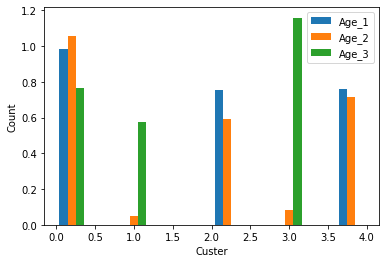

In [39]:
# Plot bar graph for age
plt.hist([Age_1.Cluster, Age_2.Cluster, Age_3.Cluster,], density =True, label=['Age_1', 'Age_2', 'Age_3'])
plt.xlabel("Custer")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

- Cluster 0 and 4 contains the most oldest people
- Cluster 1 and 3 contains the most youngest people
- Cluster 3 contains all age groups with not much difference in number

# 5. Finishing time <a name="question3"></a>